In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df_archive = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/euphemism project/archive_euph_both.csv')
df_nyt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/euphemism project/nyt_euph_train_both.csv')

# Function to evaluate a single label set
def evaluate_predictions(predictions, true_labels):
    mask = ~pd.isna(true_labels)
    true_labels = true_labels[mask]
    predictions = predictions[mask]

    accuracy = accuracy_score(true_labels, predictions)
    report = classification_report(true_labels, predictions)
    confusion = confusion_matrix(true_labels, predictions)
    return accuracy, report, confusion

In [4]:
# Evaluate NYT dataset
nyt_euph_accuracy, nyt_euph_report, nyt_euph_confusion = evaluate_predictions(df_nyt['is_euph_pred'], df_nyt['actual_euph'])
nyt_category_accuracy, nyt_category_report, nyt_category_confusion = evaluate_predictions(df_nyt['cat_pred'], df_nyt['actual_cat'])

# Evaluate Archive dataset
archive_euph_accuracy, archive_euph_report, archive_euph_confusion = evaluate_predictions(df_archive['is_euph_pred'], df_archive['actual_euph'])
archive_category_accuracy, archive_category_report, archive_category_confusion = evaluate_predictions(df_archive['cat_pred'], df_archive['actual_cat'])

# Print NYT evaluation results
print("NYT Euphemism Evaluation")
print("Accuracy:", nyt_euph_accuracy)
print("Classification Report:\n", nyt_euph_report)
print("Confusion Matrix:\n", nyt_euph_confusion)

print("\nNYT Category Evaluation")
print("Accuracy:", nyt_category_accuracy)
print("Classification Report:\n", nyt_category_report)
print("Confusion Matrix:\n", nyt_category_confusion)

NYT Euphemism Evaluation
Accuracy: 0.6443452380952381
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.70      0.59       248
         1.0       0.78      0.61      0.68       424

    accuracy                           0.64       672
   macro avg       0.65      0.66      0.64       672
weighted avg       0.68      0.64      0.65       672

Confusion Matrix:
 [[174  74]
 [165 259]]

NYT Category Evaluation
Accuracy: 0.5342261904761905
Classification Report:
                             precision    recall  f1-score   support

          bodily functions       0.00      0.00      0.00         8
                     death       0.12      0.69      0.20        36
                employment       0.65      0.70      0.67        80
                      misc       0.00      0.00      0.00        92
physical/mental attributes       0.73      0.72      0.72       225
                   politcs       0.00      0.00      0.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [5]:
# Print Archive evaluation results
print("NYT Archive Euphemism Evaluation")
print("Accuracy:", archive_euph_accuracy)
print("Classification Report:\n", archive_euph_report)
print("Confusion Matrix:\n", archive_euph_confusion)

print("\nNYT Category Evaluation")
print("Accuracy:", archive_category_accuracy)
print("Classification Report:\n", archive_category_report)
print("Confusion Matrix:\n", archive_category_confusion)

NYT Archive Euphemism Evaluation
Accuracy: 0.7366771159874608
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.90      0.68        99
         1.0       0.94      0.66      0.78       220

    accuracy                           0.74       319
   macro avg       0.74      0.78      0.73       319
weighted avg       0.81      0.74      0.75       319

Confusion Matrix:
 [[ 89  10]
 [ 74 146]]

NYT Category Evaluation
Accuracy: 0.525
Classification Report:
                             precision    recall  f1-score   support

          bodily functions       0.00      0.00      0.00         2
                     death       0.22      0.72      0.34        29
                employment       0.62      0.72      0.67        69
                      misc       0.00      0.00      0.00        24
physical/mental attributes       0.68      0.43      0.53       106
                  politics       0.67      0.62      0.65        82
   

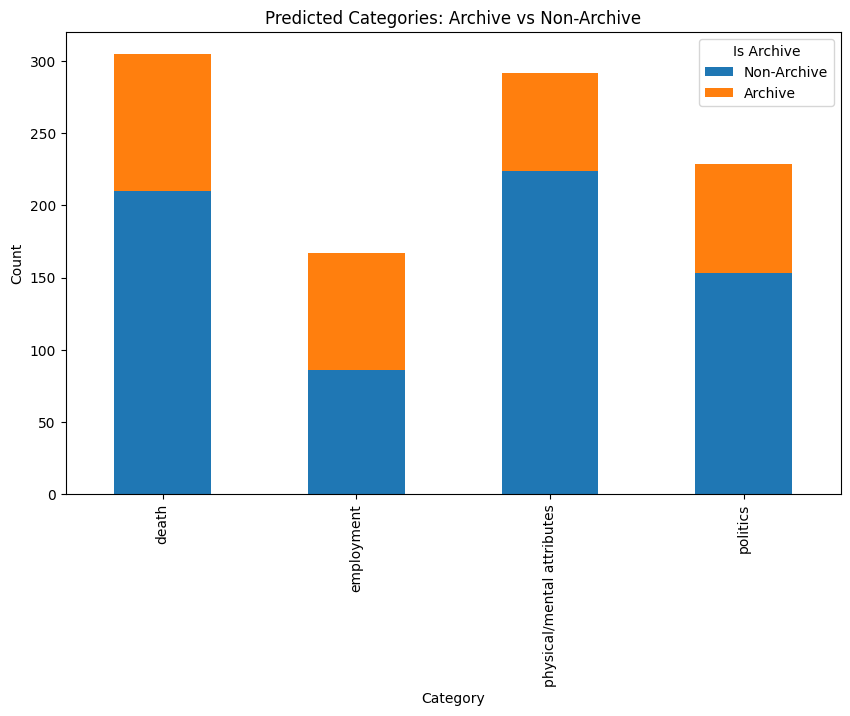

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_archive['is_archive'] = True
df_nyt['is_archive'] = False

# Concatenate the DataFrames
df_combined = pd.concat([df_archive, df_nyt], ignore_index=True)

category_column = 'cat_pred'

category_counts = df_combined.groupby([category_column, 'is_archive']).size().unstack(fill_value=0)

category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Predicted Categories: Archive vs Non-Archive')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Is Archive', labels=['Non-Archive', 'Archive'])
plt.show()

In [10]:
# Filter the dataset for rows where 'pet' is a euphemism for money
euphemisms = df_combined[(df_combined['is_euph_pred'] == 1) & (df_combined['actual_euph'] == 1)]


In [11]:
category_column = 'cat_pred'

# Group by the specified column and 'is_archive', then count the occurrences
category_counts = euphemisms.groupby([category_column, euphemisms['pet']]).size().unstack(fill_value=0)

# Display the counts
print(category_counts)

# Sum total for each archive and non-archive
sum_total = category_counts.sum(axis=0)
top_10_pets = sum_total.sort_values(ascending=False).head(10)
top_10_pets

pet                         a certain age  able-bodied  accident  addict  \
cat_pred                                                                   
death                                   1            0         4       3   
employment                              0            1         0       0   
physical/mental attributes              1            1         3       2   
politics                                0            0         1       0   

pet                         addicts  advanced age  african american  \
cat_pred                                                              
death                             7             0                 2   
employment                        0             0                 0   
physical/mental attributes        2             2                 3   
politics                          0             0                 2   

pet                         african americans  aging  alcoholic  ...  sober  \
cat_pred                             

pet
elderly              65
low-income           31
late                 21
aging                17
people of color      17
african americans    15
wealthy              12
disadvantaged        11
experienced          10
addicts               9
dtype: int64

<Figure size 1200x800 with 0 Axes>

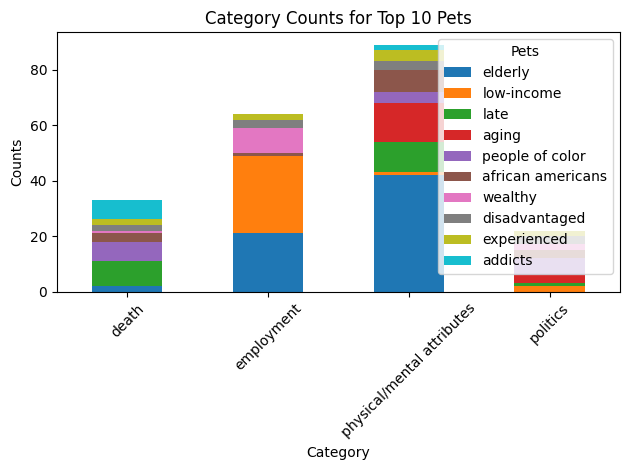

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'category_counts' and 'top_10_pets' are already defined as per your code
category_column = 'cat_pred'

# Group by the specified column and 'pet', then count the occurrences
category_counts = euphemisms.groupby([category_column, euphemisms['pet']]).size().unstack(fill_value=0)

# Sum total for each archive and non-archive
sum_total = category_counts.sum(axis=0)
top_10_pets = sum_total.sort_values(ascending=False).head(10)

# Filter the category_counts to include only the top 10 pets
filtered_category_counts = category_counts[top_10_pets.index]

# Plot the bar plot
plt.figure(figsize=(12, 8))
filtered_category_counts.plot(kind='bar', stacked=True)

plt.title('Category Counts for Top 10 Pets')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.legend(title='Pets', loc= "upper right")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [12]:
# Install packages that we need
%%capture
!pip install sentencepiece
!pip install transformers
!pip install sentence-transformers
!pip install umap-learn
!pip install altair --upgrade -U
!pip install pyarrow==11.0.0
!pip install --upgrade --no-cache-dir gdown

import gdown
# For working with JSON files
import json
# For working with LMs
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch
import numpy as np
import pandas as pd
import operator
# For printing long documents
import textwrap
# For status bars
from tqdm.notebook import tqdm
# For dimensionality reduction
!pip install umap-learn
import umap.umap_ as umap
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [13]:
from transformers import BertTokenizer, BertConfig
from sentence_transformers import SentenceTransformer

# Load the pre-trained DistilBERT sentence transformer model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
tokenizer = model.tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
from sklearn.preprocessing import LabelEncoder
import torch
from sklearn.model_selection import train_test_split

#sentence	author	title	pet	is_euph_pred	cat_pred	actual_euph	actual_cat	is_archive

X_train, X_test, y_train, y_test = train_test_split(euphemisms['sentence'], euphemisms['cat_pred'], test_size=0.2, random_state=42)
euph_embeddings = model.encode(euphemisms['sentence'].tolist())

In [15]:
reducer = umap.UMAP()
euph_embeddings_umap = reducer.fit_transform(euph_embeddings)

In [16]:
euph_embeddings_plot = pd.DataFrame({"x": euph_embeddings_umap[:, 0],
                           "y": euph_embeddings_umap[:, 1],
                                     "sentence": euphemisms['sentence'],
                          "title": euphemisms['title'],
                            "pet": euphemisms['pet'],
                                     "actual_cat": euphemisms['actual_cat'],
                                     "is_archive": euphemisms['is_archive'],
                          })

euph_embeddings_plot.head()

,x,y,sentence,title,pet,actual_cat,is_archive
6,12.746697,7.349593,elderly women constitute the majority of socia...,what-gender-gap,elderly,physical/mental attributes,True
7,11.938906,9.156232,and since women rarely have seniority in the l...,what-gender-gap,laid off,employment,True
8,7.496405,8.993382,the international committee of the red cross w...,abroad-at-home-a-small-far-off-place,detention camp,politics,True
9,11.019039,7.895824,hiatt also mentions cuts in money for venereal...,abroad-at-home-hazardous-to-health,venereal disease,sexual activity,True
11,13.064964,7.684971,peterson shows that almost 30 percent of the b...,abroad-at-home-social-security-alarm,elderly,physical/mental attributes,True


In [20]:
# Plot the documents, color the points by their category, create hover tooltips with document info
import altair as alt

# Create chart
alt.Chart(euph_embeddings_plot,
          # Title for plot / size of points
          title="Text Similarity").mark_circle(size=200).encode(
    # Define x-axis category, which is the "x" column in the dataframe
    alt.X('x',
        scale=alt.Scale(zero=False),
        # Because point positions and axes don't matter, we remove axis labels
        axis=alt.Axis(labels=False),
    ),
    # Define y-axis category, which is the "y" column in the dataframe
    alt.Y("y",
        # Because point positions and axes don't matter, we remove axis labels
          axis=alt.Axis(labels=False)),
    # Color by label
    color = "is_archive",
    # Color by genre
    #color = "genre",
    # Define categories that show up in the hover tooltip
    tooltip=['sentence', 'pet', 'title', 'actual_cat'],
    ).interactive().properties(
    width=500,
    height=500
)

alt.Chart(...)